<a href="https://colab.research.google.com/github/cihatkayack/llmh/blob/main/LLM_Understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author: Cihat Kaya**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install nbformat

In [ ]:

import nbformat

fn = '/content/drive/MyDrive/LLM/LLM_Under/LLM_Understandingg'   # düzenlemek istediğiniz dosya adı
nb = nbformat.read(fn, as_version=4)

# Eğer widget metadata’sı varsa sil
if 'widgets' in nb.metadata:
    del nb.metadata['widgets']

nbformat.write(nb, fn)
print("metadata.widgets kaldırıldı")


metadata.widgets kaldırıldı


# What is Large Language Model (LLM)?


- **Large language models (LLMs) are a category of foundation models trained on immense amounts of data making them capable of understanding and generating natural language and other types of content to perform a wide range of tasks.**


- Big data can come from publicly available sources, or it can be proprietary. Examples of big data include:

 - Customer survey data
 - Records of user behavior within an application
 - Sensor data
 - Social media feeds
 - Webpage content
 - Surveillance data
 - Audio recordings

- Here is a list of some of the most important areas where LLMs benefit organizations:

 - Text generation: language generation abilities, such as writing emails, blog posts or other mid-to-long form content in response to prompts that can be refined and polished. An excellent example is retrieval-augmented generation (RAG).

 - Content summarization: summarize long articles, news stories, research reports, corporate documentation and even customer history into thorough texts tailored in length to the output format.

 - AI assistants: chatbots that answer customer queries, perform backend tasks and provide detailed information in natural language as a part of an integrated, self-serve customer care solution.

 - Code generation: assists developers in building applications, finding errors in code and uncovering security issues in multiple programming languages, even “translating” between them.

 - Sentiment analysis: analyze text to determine the customer’s tone in order understand customer feedback at scale and aid in brand reputation management.

 - Language translation: provides wider coverage to organizations across languages and geographies with fluent translations and multilingual capabilities.

<img src="https://drive.google.com/uc?export=view&id=1yxoJpHMLkrf7sK6oNH_q8zTCeLxOIYsE" width=700, height=400>


Core Components of an LLM

 1. Tokenizer: Breaks input text into tokens (words or subwords) for processing.
 2. Embedding Layer: Maps tokens to high-dimensional vectors capturing semantic meaning.
 3. Transformer Blocks: Apply self-attention and feedforward layers to model context and relationships across tokens.
 4. Output Layer: Produces final predictions, such as next-token probabilities or task-specific outputs.



# Understanding Large Language Models (LLMs)



## Exploring GPT-2 Inference Parameters


### Getting Started
Before diving into building a language model from scratch, you'll begin with some fun experiments using a pretrained [GPT-2 model](https://huggingface.co/docs/transformers/v4.51.3/en/model_doc/gpt2#gpt-2). As a first step, you'll observe how the model 'thinks' and explore how its responses change with different prompts.

<table>
  <tr>
    <td style="vertical-align: top; padding-left: 20px;">
      <b>GPT-2 Model Features</b>
      <table border="1" cellpadding="5" cellspacing="0">
        <tr><th>Feature</th><th>Value</th></tr>
        <tr><td>Model Name</td><td>gpt2</td></tr>
        <tr><td>Parameters</td><td>124 million</td></tr>
        <tr><td>Architecture</td><td>Transformer Decoder</td></tr>
        <tr><td>Layers</td><td>12</td></tr>
        <tr><td>Hidden Size</td><td>768</td></tr>
        <tr><td>Attention Heads</td><td>12</td></tr>
        <tr><td>Vocabulary Size</td><td>50,257</td></tr>
        <tr><td>Context Window</td><td>1,024 tokens</td></tr>
        <tr><td>Pretrained Corpus</td><td>WebText (~8M documents)</td></tr>
        <tr><td>Task</td><td>Language Modeling (next-token prediction)</td></tr>
      </table>
    </td>
  </tr>
</table>


In text generation tasks, language models like GPT-2 rely on decoding strategies to sample the next word from a probability distribution. These strategies are controlled by several key inference parameters:

* `Temperature` controls the randomness of predictions — lower values (e.g., 0.2) make outputs more conservative and repetitive, while higher values (e.g., 1.2) produce more diverse and surprising results.

* `Top-k` sampling limits the model to choosing from the top k most likely words, promoting focus but potentially reducing variation.

* `Top-p` sampling (also known as nucleus sampling) selects from the smallest set of words whose cumulative probability exceeds p, balancing diversity and relevance.

* `Max length` defines how many tokens the model is allowed to generate in a single run.





*In this experiment, you will interactively explore how varying these parameters affects the output generated by a pretrained GPT-2 model. Using a fixed prompt, you will adjust the sliders and observe how the model's responses change — helping you develop an intuition for how decoding techniques shape model behavior, coherence, and creativity*

In [ ]:
#@title Exploring GPT-2 Inference Parameters
# Importing Libraries
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch
import warnings
import json

import ipywidgets as widgets
from IPython.display import display, clear_output

from google.colab import output
output.enable_custom_widget_manager()

warnings.filterwarnings("ignore")


# Load GPT-2 model
model_name = "gpt2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)
model.eval().to("cuda" if torch.cuda.is_available() else "cpu")

# Fixed prompt
fixed_prompt = "The robot paused before opening the door. What it saw inside was beyond anything it had ever expected."
prompt_display = widgets.HTML(f"<b>📌 Fixed Prompt:</b><br><pre>{fixed_prompt}</pre>")

# Display model name
model_display = widgets.HTML(f"<h3> Using Model: <code>{model_name.upper()}</code></h3>")

# Decoding parameter sliders
temperature_slider = widgets.FloatSlider(
    value=0.7, min=0.1, max=1.5, step=0.1,
    description='🌡 Temp:',
    style={'description_width': '80px'},
    tooltip='Controls randomness (0 = deterministic, >1 = more creative)'
)

top_p_slider = widgets.FloatSlider(
    value=0.9, min=0.1, max=1.0, step=0.05,
    description='Top-p:',
    style={'description_width': '80px'},
    tooltip='Samples from the top cumulative probability (nucleus sampling)'
)

top_k_slider = widgets.IntSlider(
    value=50, min=0, max=100, step=5,
    description='Top-k:',
    style={'description_width': '80px'},
    tooltip='Samples only from top-k most likely tokens'
)

max_length_slider = widgets.IntSlider(
    value=100, min=20, max=300, step=10,
    description='Max Len:',
    style={'description_width': '80px'},
    tooltip='Maximum number of tokens to generate'
)

# Presets dropdown
preset_dropdown = widgets.Dropdown(
    options=[
        ('Default (Balanced)', {'temperature': 0.7, 'top_p': 0.9, 'top_k': 50}),
        ('Creative', {'temperature': 1.2, 'top_p': 0.95, 'top_k': 40}),
        ('Conservative', {'temperature': 0.5, 'top_p': 0.8, 'top_k': 30}),
        ('Chaotic', {'temperature': 1.5, 'top_p': 1.0, 'top_k': 0}),
    ],
    description="🎛 Preset:",
    layout=widgets.Layout(width="50%")
)

def on_preset_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        config = change['new']
        temperature_slider.value = config['temperature']
        top_p_slider.value = config['top_p']
        top_k_slider.value = config['top_k']

preset_dropdown.observe(on_preset_change)

# Generate button and output area
generate_button = widgets.Button(description="Generate Text", button_style='success')
output_area = widgets.Output()

def on_generate_clicked(_):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    inputs = tokenizer(fixed_prompt, return_tensors="pt").to(device)
    outputs = model.generate(
        **inputs,
        max_length=max_length_slider.value,
        do_sample=True,
        temperature=temperature_slider.value,
        top_p=top_p_slider.value,
        top_k=top_k_slider.value,
        pad_token_id=tokenizer.eos_token_id
    )
    generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

    output_area.clear_output()
    with output_area:
        print("📜 Generated Text:\n")
        print(generated_text)

generate_button.on_click(on_generate_clicked)

# Layout for UI
param_sliders = widgets.HBox([
    temperature_slider, top_p_slider, top_k_slider, max_length_slider
])

ui = widgets.VBox([
    model_display,
    prompt_display,
    preset_dropdown,
    param_sliders,
    generate_button,
    output_area
])

display(ui)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

# Understanding LLM Input Data [[1]](https://www.youtube.com/watch?v=quh7z1q7-uc), [[2]](https://www.deeplearning.ai/short-courses/retrieval-optimization-from-tokenization-to-vector-quantization/)

## Tokenizing text

A tokenizer is a tool or process that breaks down text or data into smaller units, such as words or symbols, called tokens.

Various models choose different tokenization methods. For example, OpenAI prefers Byte Per Encoding (BPE), while WordPiece is quite commonly used by some other providers, including open-source sentence transformser, that you use. However, Cohere select work best for their English model, but Unigram to create a multilingual one.

Vocabulary size is a tokenizer hyperparameter and must be selected upfront and it's usually at least 30,000 tokens. For the multilingual models that might be even a few times more.

<img src="https://drive.google.com/uc?export=view&id=1L_QOQSz8sn569uaE-Rv5E6GZxZ12cDkJ" width="700" height="400">




### Simple Tokenizer

Let’s discuss how we split input text into individual tokens, a required preprocessing step for creating embeddings for an LLM. These tokens are either individual words or special characters, including punctuation characters, as shown in figure.

<img src="https://drive.google.com/uc?export=view&id=1DNwPZ_6lzN3HhuJqbjA5IXhFFo_bNWrk" width="700">



In [ ]:
!wget https://raw.githubusercontent.com/rasbt/LLMs-from-scratch/main/ch02/01_main-chapter-code/the-verdict.txt \
     -O verdict.txt

--2025-04-25 21:25:18--  https://raw.githubusercontent.com/rasbt/LLMs-from-scratch/main/ch02/01_main-chapter-code/the-verdict.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20479 (20K) [text/plain]
Saving to: ‘verdict.txt’

verdict.txt         100%[===================>]  20.00K  --.-KB/s    in 0s      

2025-04-25 21:25:19 (110 MB/s) - ‘verdict.txt’ saved [20479/20479]



In [ ]:
with open("verdict.txt", "r", encoding="utf-8") as f:
 raw_text = f.read()
print("Total number of character:", len(raw_text))
print(raw_text[:99])

Total number of character: 20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


Our goal is to tokenize this 20,479-character short story into individual words and special characters that we can then turn into embeddings for LLM training.

How can we best split this text to obtain a list of tokens? For this, we go on a small excursion and use Python’s regular expression library re for illustration purposes. (You don’t have to learn or memorize any regular expression syntax since we will later transition to a prebuilt tokenizer.)

In [ ]:
import re

preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', raw_text)
preprocessed = [item.strip() for item in preprocessed if item.strip()]
print(preprocessed[:30])

['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in']


#### Converting tokens into token IDs




Next, we convert the text tokens into token IDs that we can process via embedding layers later

<img src="https://drive.google.com/uc?export=view&id=1Ad9B2CvpMrW7hT5K2U3SmOQnTdoWoOC4" width="800">

In [ ]:
all_words = sorted(set(preprocessed))
vocab_size = len(all_words)

print(vocab_size)

1130


In [ ]:
vocab = {token:integer for integer,token in enumerate(all_words)}

for i, item in enumerate(vocab.items()):
    print(item)
    if i >= 20:
        break

('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)
('At', 18)
('Be', 19)
('Begin', 20)


In [ ]:
class SimpleTokenizerV1:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = {i:s for s,i in vocab.items()}

    def encode(self, text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)

        preprocessed = [
            item.strip() for item in preprocessed if item.strip()
        ]
        ids = [self.str_to_int[s] for s in preprocessed]
        return ids

    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        # Replace spaces before the specified punctuations
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
        return text

- The encode function turns text into token IDs
- The decode function turns token IDs back into text

<img src="https://drive.google.com/uc?export=view&id=1H_68mwQN_JXtxlv44vS_e8eHWr4HnQPG" width="800">

In [ ]:
tokenizer = SimpleTokenizerV1(vocab)

text = """"It's the last he painted, you know,"
           Mrs. Gisburn said with pardonable pride."""
ids = tokenizer.encode(text)
print(ids)

[1, 56, 2, 850, 988, 602, 533, 746, 5, 1126, 596, 5, 1, 67, 7, 38, 851, 1108, 754, 793, 7]


In [ ]:
tokenizer.decode(ids)

'" It\' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.'

In [ ]:
tokenizer.decode(tokenizer.encode(text))

'" It\' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.'

#### Adding special context tokens

We need to modify the tokenizer to handle unknown words. We also need to address the usage and addition of special context tokens that can enhance a model’s understanding of context or other relevant information in the text. These special tokens can include markers for unknown words and document boundaries, for example. In particular, we will modify the vocabulary and tokenizer, SimpleTokenizerV2, to support two new tokens, <|unk|> and <|endoftext|>

In [ ]:
all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>", "<|unk|>"])

vocab = {token:integer for integer,token in enumerate(all_tokens)}

In [ ]:
for i, item in enumerate(list(vocab.items())[-5:]):
    print(item)

('younger', 1127)
('your', 1128)
('yourself', 1129)
('<|endoftext|>', 1130)
('<|unk|>', 1131)


In [ ]:
class SimpleTokenizerV2:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = { i:s for s,i in vocab.items()}

    def encode(self, text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        preprocessed = [
            item if item in self.str_to_int
            else "<|unk|>" for item in preprocessed    # Replaces unknown words by <|unk|> tokens
        ]

        ids = [self.str_to_int[s] for s in preprocessed]
        return ids

    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        # Replace spaces before the specified punctuations
        text = re.sub(r'\s+([,.:;?!"()\'])', r'\1', text)
        return text

In [ ]:
tokenizer = SimpleTokenizerV2(vocab)

text1 = "Hello, do you like tea?"
text2 = "In the sunlit terraces of the palace."

text = " <|endoftext|> ".join((text1, text2))

print(text)

Hello, do you like tea? <|endoftext|> In the sunlit terraces of the palace.


In [ ]:
tokenizer.encode(text)

[1131, 5, 355, 1126, 628, 975, 10, 1130, 55, 988, 956, 984, 722, 988, 1131, 7]

In [ ]:
tokenizer.decode(tokenizer.encode(text))

'<|unk|>, do you like tea? <|endoftext|> In the sunlit terraces of the <|unk|>.'

### BPE - Byte-Pair Encoding

Byte per encoding is a common choice. BPE starts by splitting the input by whitespace characters. So a single token will never overlap two word. The vocabulary is initialized with all characters in the training set. New tokens are iteratively created by merging two tokens, which are the most often put next to each other.

- GPT-2 used BytePair encoding (BPE) as its tokenizer

- it allows the model to break down words that aren't in its predefined vocabulary into smaller subword units or even individual characters, enabling it to handle out-of-vocabulary words

- For instance, if GPT-2's vocabulary doesn't have the word "unfamiliarword," it might tokenize it as ["unfam", "iliar", "word"] or some other subword breakdown, depending on its trained BPE merges

- The original BPE tokenizer can be found here: https://github.com/openai/gpt-2/blob/master/src/encoder.py

Let’s explore a more advanced tokenization scheme called Byte Pair Encoding (BPE). The BPE tokenizer was used to train large language models such as GPT-2, GPT-3, and the original model behind ChatGPT.

**1. Core Idea of BPE**

Instead of memorizing entire words, BPE learns frequently occurring subword units. In other words, it combines commonly seen letters and letter groups to form new words.

- For example:

If the word "unhappiness" is not in the vocabulary, BPE might split it like this:

    un + happiness

    un + hap + pi + ness

This allows the model to break down and understand words it has never seen before.

**2. How It Handles Unknown Words (Instead of Using <|unk|>)**

If a word is not in the model’s vocabulary, BPE processes it as follows:

- **Checks for Larger Known Chunks:**  
  If the word is directly in the vocabulary, it uses that word.  
  For example, if "dog" is in the vocabulary, it is used as is.

- **Breaks the Word into Recognizable Parts:**  
  If the whole word is not found, BPE tries to split it into known subword units.  
  For example, if "someunknownPlace" is unknown:

    some ✅ (might be in the vocabulary)  
    unknown ✅ (might be in the vocabulary)  
    Place ✅ (might be in the vocabulary)

- **Uses Even Smaller Subunits:**  
  If the parts are still unknown, BPE continues breaking it into smaller chunks:

    unk + now + nP + lace

If even those are not found, it may encode the word character by character:

    s + o + m + e + ...

This way, even a completely unknown word can still be processed and understood by splitting it into its smallest components.

**3. Example: Processing an Unknown Word**

Let’s say the word "ChatGPTlikeModel" is completely unknown. BPE might work as follows:

1. It checks the entire word, but it’s not in the vocabulary.
2. It splits the word into the largest known parts:

    "ChatGPT" ✅ (might be known)  
    "like" ✅ (might be known)  
    "Model" ✅ (might be known)

If "ChatGPT" and "Model" are not known, it could break them down into even smaller subunits:

    "Chat" + "G" + "P" + "T" + "like" + "Model"

So, no word is ever treated as fully "unknown". The model finds its internal components and uses them to process the word.

**4. Summary**

BPE learns frequently used letter groups rather than memorizing full words. When it encounters an unknown word:

- It checks if the full word exists in the vocabulary. If not,
- It breaks the word into the largest known subword units. If those aren't available,
- It further splits the word into smaller components (even down to individual characters).

This approach allows the model to handle unknown words without needing a special <|unk|> (unknown word) token.


####How Byte-Pair Encoding (BPE) Works?

Suppose we have a text corpus with the following four words:  
**“ab”, “bc”, “bcd” and “cde”**.

We begin by calculating the frequencies of each byte (character).  
Initial vocabulary consists of all the unique characters in the corpus like:  
`{“a”, “b”, “c”, “d”, “e”}`

#### Step 1: Initialize the Vocabulary

`Vocabulary = {"a", "b", "c", "d", "e"}`

#### Step 2: Calculate the frequency of each byte or character in the text corpus:

`Frequency = {"a": 1, "b": 3, "c": 3, "d": 2, "e": 1}`

#### Step 3: Find the most frequent pair of two characters

`Most frequent pair is "bc" with a frequency of 2.`

#### Step 4: Merge the pair to create a new subword unit.

`Merge "bc" to create a new subword unit "bc".`

#### Step 5: Update frequency counts of all the bytes or characters that contain the merged pair.

Update the frequency counts of all the bytes or characters that contain “bc”:

`Frequency = {"a": 1, "b": 2, "c": 3, "d": 2, "e": 1, "bc": 2}`

#### Step 6: Add the new subword unit to the vocabulary

`Vocabulary = {"a", "b", "c", "d", "e", "bc"}`

Repeat steps 3-6 until the desired vocabulary size is reached.

#### Step 7: Represent the text corpus using subword units

`Resulting vocabulary consists of the following subword units: {"a", "b", "c", "d", "e", "bc", "cd", "de","ab","bcd","cde"}.`

Original text corpus can be represented using these subword units as follows:

`"ab" -> "a" + "b"`

`"bc" -> "bc"`

`"bcd" -> "bc" + "d"`

`"cde" -> "c" + "de"`

This representation helps in reducing the vocabulary size while maintaining the original meaning and structure of the text.

Lets look at anathor exampler



<img src="https://drive.google.com/uc?export=view&id=1bzxufPYBETaQd_vcF1WNCqRQQHCFC4yv" width="500">

- BPE tokenizers break down unknown words into subwords and individual characters:

<img src="https://drive.google.com/uc?export=view&id=1TH2_iB9vImGUQHYMWrB99qZEl14m5WUt" width="800">

Lets look at the code example

A tokenizer is a general component that requires a selected tokenization model to be passed as an argument. It also allows setting some tokenization that will be run on each input text.

**Whitespace** pre-tokenization helps to split the text into words.

The last thing you will set is the trainer object and the size of a target vocabulary. Practically, you will never go below at least a few thousand, but in this case, 14 should be fine for our experiment.

In [ ]:
from tokenizers.trainers import BpeTrainer
from tokenizers.models import BPE
from tokenizers import Tokenizer
from tokenizers.pre_tokenizers import Whitespace

bpe_tokenizer = Tokenizer(BPE())
bpe_tokenizer.pre_tokenizer = Whitespace()

bpe_trainer = BpeTrainer(vocab_size=14)

In [ ]:
training_data = [
    """walker walked a long walk""",
]

In [ ]:
bpe_tokenizer.train_from_iterator(training_data, bpe_trainer)

In [ ]:
bpe_tokenizer.get_vocab()

{'d': 1,
 'g': 3,
 'walke': 13,
 'al': 10,
 'a': 0,
 'r': 8,
 'e': 2,
 'l': 5,
 'k': 4,
 'w': 9,
 'walk': 12,
 'n': 6,
 'wal': 11,
 'o': 7}

In [ ]:
bpe_tokenizer.encode("walker walked a long walk").ids

[13, 8, 13, 1, 0, 5, 7, 6, 3, 12]

In [ ]:
bpe_tokenizer.encode("walker walked a long walk").tokens

['walke', 'r', 'walke', 'd', 'a', 'l', 'o', 'n', 'g', 'walk']

In [ ]:
bpe_tokenizer.encode("akwirw ier").ids

[0, 4, 9, 8, 9, 2, 8]

In [ ]:
bpe_tokenizer.encode("akwirw ier").tokens

['a', 'k', 'w', 'r', 'w', 'e', 'r']

### Exercise 1: Prepare your own text dataset

#### Tokenizer Training & Evaluation Steps (Using BPE)

### Step 1: Prepare Training Data
- Avoid trivial or very small datasets.
- Choose a meaningful, moderately sized corpus (e.g., `verdict.txt` or similar).
- Ensure the text is clean and appropriate for language modeling.

### Step 2: Initialize and Train the BPE Tokenizer
- Use your own `bpe_tokenizer` implementation or a relevant library.
- Train it on the selected dataset with a suitable number of merge operations (iterations).
- Track and save the generated vocabulary.

### Step 3: Test with Logical Sentences
- Prepare a few meaningful and grammatically correct sentences.
- Tokenize these sentences with your trained tokenizer.
- Check:
  - Are common words preserved?
  - Are subword units logical?

### Step 4: Evaluate and Analyze Incorrect Tokenization
- If results are odd:
  - Was the training data too small?
  - Were the number of merge operations insufficient?
  - Was there a mismatch between training data and test sentence domain?

### Step 5: Test with Random or Artificial Words
- Use made-up words such as:
  - `kwriodte`
  - `blenkratosync`
  - `dravolintyxis`
- Tokenize these and analyze:
  - How does the tokenizer split unknown (OOV) words?
  - Does it fall back to character-level tokens?
  - Are subword splits meaningful?

### Step 6: Compare Different Datasets
- Train the tokenizer on multiple datasets (e.g., other `.txt` files or public corpora).

You can use this:

`!wget https://gist.githubusercontent.com/PrithivirajDamodaran/67af3b055e974a9caec94d96e7591607/raw/0d6babef04eac378e5a5908568ee0ea280809100/big.txt -O big.txt`

- Keep training settings constant to ensure fair comparison.
- Evaluate using both real and made-up sentences.
- Save and compare:
  - Vocabulary size
  - Tokenization examples
- Finally, discuss:
  - Which dataset produced the best results?
  - Why was it more effective?


In [ ]:
# Libraries
from tokenizers.trainers import BpeTrainer
from tokenizers.models import BPE
from tokenizers import Tokenizer
from tokenizers.pre_tokenizers import Whitespace


"""
Your code here
"""

In [ ]:
bpe_tokenizer.get_vocab()

In [ ]:
text = "This is a test sentence for BPE."

"""
Your code here
"""

print("Decoded Text:", decoded_text)

Token IDs: [28, 89, 69, 34, 125, 77, 326, 73, 150, 140, 12, 25, 15, 7]
Tokens: ['T', 'his', 'is', 'a', 'te', 'st', 'sent', 'en', 'ce', 'for', 'B', 'P', 'E', '.']
Decoded Text: T his is a te st sent en ce for B P E .


In [ ]:
text = "blenkratosync"

encoded = bpe_tokenizer.encode(text)

"""
Your code here
"""

print("Decoded Text:", decoded_text)

Token IDs: [35, 45, 73, 44, 105, 72, 52, 58, 47, 36]
Tokens: ['b', 'l', 'en', 'k', 'ra', 'to', 's', 'y', 'n', 'c']
Decoded Text: b l en k ra to s y n c


#### Second Text Data

In [ ]:
!wget https://gist.githubusercontent.com/PrithivirajDamodaran/67af3b055e974a9caec94d96e7591607/raw/0d6babef04eac378e5a5908568ee0ea280809100/big.txt -O big.txt

--2025-04-22 14:05:11--  https://gist.githubusercontent.com/PrithivirajDamodaran/67af3b055e974a9caec94d96e7591607/raw/0d6babef04eac378e5a5908568ee0ea280809100/big.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6483133 (6.2M) [text/plain]
Saving to: ‘big.txt’

big.txt             100%[===================>]   6.18M  --.-KB/s    in 0.03s   

2025-04-22 14:05:13 (203 MB/s) - ‘big.txt’ saved [6483133/6483133]



In [ ]:
from tokenizers.trainers import BpeTrainer
from tokenizers.models import BPE
from tokenizers import Tokenizer
from tokenizers.pre_tokenizers import Whitespace

"""
Your code here
"""


In [ ]:
text = "This is a test sentence for BPE."

"""
Your code here
"""
print("Decoded Text:", decoded_text)

Token IDs: [641, 100, 62, 81, 203, 80, 122, 332, 135, 33, 47, 36, 13]
Tokens: ['This', 'is', 'a', 't', 'est', 's', 'ent', 'ence', 'for', 'B', 'P', 'E', '.']
Decoded Text: This is a t est s ent ence for B P E .


In [ ]:
text = "blenkratosync"

"""
Your code here
"""

print("Decoded Text:", decoded_text)

Token IDs: [306, 98, 72, 79, 97, 196, 86, 75, 64]
Tokens: ['bl', 'en', 'k', 'r', 'at', 'os', 'y', 'n', 'c']
Decoded Text: bl en k r at os y n c


### Tiktoken

In [ ]:
!pip install tiktoken==0.7.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 57.5 MB/s eta 0:00:00


In [ ]:
from importlib.metadata import version
import tiktoken
print("tiktoken version:", version("tiktoken"))

tiktoken version: 0.7.0


Once installed, we can instantiate the BPE tokenizer from tiktoken as follows:

In [ ]:
tokenizer = tiktoken.get_encoding("gpt2")

The usage of this tokenizer is similar to the SimpleTokenizerV2 we implemented previously via an encode method:

In [ ]:
text = (
 "Hello, do you like tea? <|endoftext|> In the sunlit terraces"
 "of someunknownPlace."
)
integers = tokenizer.encode(text, allowed_special={"<|endoftext|>"})
print(integers)

[15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 4252, 18250, 8812, 2114, 1659, 617, 34680, 27271, 13]


In [ ]:
strings = tokenizer.decode(integers)
print(strings)

Hello, do you like tea? <|endoftext|> In the sunlit terracesof someunknownPlace.


## Data sampling with a sliding window

The next step in creating the embeddings for the LLM is to generate the input–target pairs required for training an LLM. What do these input–target pairs look like? As we already learned, LLMs are pretrained by predicting the next word in a text, as depicted in figure


<img src="https://drive.google.com/uc?export=view&id=176WTsvZQtjAKzqHLPnZ1VHy7uOCFUaJA" width="800">

In [ ]:
with open("verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

enc_text = tokenizer.encode(raw_text)
print(len(enc_text))

5145


- For each text chunk, we want the inputs and targets.
- Since we want the model to predict the next word, the targets are the inputs shifted by one position to the right

In [ ]:
enc_sample = enc_text[50:]

In [ ]:
context_size = 4

x = enc_sample[:context_size]
y = enc_sample[1:context_size+1]

print(f"x: {x}")
print(f"y:      {y}")

x: [290, 4920, 2241, 287]
y:      [4920, 2241, 287, 257]


- One by one, the prediction would look like as follows:

In [ ]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]

    print(context, "---->", desired)

[290] ----> 4920
[290, 4920] ----> 2241
[290, 4920, 2241] ----> 287
[290, 4920, 2241, 287] ----> 257


In [ ]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]

    print(tokenizer.decode(context), "---->", tokenizer.decode([desired]))

 and ---->  established
 and established ---->  himself
 and established himself ---->  in
 and established himself in ---->  a


- We will take care of the next-word prediction in a later chapter after we covered the attention mechanism
- For now, we implement a simple data loader that iterates over the input dataset and returns the inputs and targets shifted by one
- Install and import PyTorch (see Appendix A for installation tips)

In [ ]:
import torch
print("PyTorch version:", torch.__version__)

PyTorch version: 2.6.0+cu124


- For this, we use a sliding window approach, changing the position by +1:

<img src="https://drive.google.com/uc?export=view&id=1zOKPf9DyxWboounyyhG0rwZO4Mplbijz" width="800">

- Create dataset and dataloader that extract chunks from the input text dataset

In [ ]:
from torch.utils.data import Dataset, DataLoader


class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        # Tokenize the entire text
        token_ids = tokenizer.encode(txt, allowed_special={"<|endoftext|>"})

        # Use a sliding window to chunk the book into overlapping sequences of max_length
        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1: i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]

def create_dataloader_v1(txt, batch_size=4, max_length=256,
                         stride=128, shuffle=True, drop_last=True,
                         num_workers=0):

    # Initialize the tokenizer
    tokenizer = tiktoken.get_encoding("gpt2")

    # Create dataset
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)

    # Create dataloader
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last, # drop_last=True drops the last batch if it is shorter than the specified batch_size to prevent loss spikes during training.
        num_workers=num_workers # The number of CPU processesto use for preprocessing
    )

    return dataloader

The GPTDatasetV1 class is based on the PyTorch Dataset class and defines how individual rows are fetched from the dataset, where each row consists of a number of token IDs (based on a max_length) assigned to an input_chunk tensor. The target_ chunk tensor contains the corresponding targets.

In [ ]:
with open("verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

In [ ]:
dataloader = create_dataloader_v1(
    raw_text, batch_size=1, max_length=4, stride=1, shuffle=False
)

data_iter = iter(dataloader)
first_batch = next(data_iter)
print(first_batch)

[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]


In [ ]:
second_batch = next(data_iter)
print(second_batch)

[tensor([[ 367, 2885, 1464, 1807]]), tensor([[2885, 1464, 1807, 3619]])]


In [ ]:
dataloader = create_dataloader_v1(raw_text, batch_size=8, max_length=4, stride=4, shuffle=False)

data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Inputs:\n", inputs)
print("\nTargets:\n", targets)

Inputs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Targets:
 tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])


# Coding an LLM architecture [[1]](https://www.youtube.com/watch?v=quh7z1q7-uc)

- Models like GPT, Gemma, Phi, Mistral, Llama etc. generate words sequentially and are based on the decoder part of the original transformer architecture
- ChatGPT, GPT4, Llama-3, Phi-3, Gemma and Gemini, they all do next word precdiction. So its a sense like the target are shifted by position one.
- Therefore, these LLMs are often referred to as "decoder-like" LLMs
- Compared to conventional deep learning models, LLMs are larger, mainly due to their vast number of parameters, not the amount of code
- We'll see that many elements are repeated in an LLM's architecture

<img src="https://drive.google.com/uc?export=view&id=1tPvE7PrvNM2CSV5MLAogJITPe_fQpO4A" width="800">

- In the previous, we used small embedding dimensions for token inputs and outputs for ease of illustration, ensuring they neatly fit on the screen
- Now we consider embedding and model sizes akin to a small GPT-2 model
- Well specifically code the architecture of the smallest GPT-2 model (124 million parameters)
- The next section will show how to load pretrained weights into our implementation, which will be compatible with model sizes of 345, 762, and 1542 million parameters
-Models like Llama and others are very similar to GPT-2 "large" model, since they are all based on the same core concepts

<img src="https://drive.google.com/uc?export=view&id=1UilOjCxm1BTBLOgG17-Xgaa1vwrEJ4aN" width="1200">

- Embedding layers produce continuous value vectors.

- Dropout is no longer popular and is not commonly used in LLMs.

- Linear layers are not used in modern architectures. A linear layer is essentially just a simple matrix multiplication.

- Configuration details for the 124 million parameter GPT-2 model (GPT-2 "small") include:

In [ ]:
!pip install tiktoken

In [ ]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,    # Vocabulary size
    "context_length": 1024, # Context length
    "emb_dim": 768,         # Embedding dimension
    "n_heads": 12,          # Number of attention heads
    "n_layers": 12,         # Number of layers
    "drop_rate": 0.0,       # Dropout rate
    "qkv_bias": False       # Query-Key-Value bias
}

## Coding the GPT model

- We are almost there: now let's plug in the transformer block into the architecture we coded at the very beginning of this notebook so that we obtain a useable GPT architecture
- Note that the transformer block is repeated multiple times; in the case of the smallest 124M GPT-2 model, we repeat it 12 times:

<img src="https://drive.google.com/uc?export=view&id=1GbDioSyY_YJAOWeJxGzYI8lV-hMaeFtP" width="800">

- The corresponding code implementation, where `cfg["n_layers"] = 12`:

In [ ]:
#@title Required codes
# Copyright (c) Sebastian Raschka under Apache License 2.0 (see LICENSE.txt).
# Source for "Build a Large Language Model From Scratch"
#   - https://www.manning.com/books/build-a-large-language-model-from-scratch
# Code: https://github.com/rasbt/LLMs-from-scratch

import tiktoken
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader


class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        # Tokenize the entire text
        token_ids = tokenizer.encode(txt, allowed_special={"<|endoftext|>"})

        # Use a sliding window to chunk the book into overlapping sequences of max_length
        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1: i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]


def create_dataloader_v1(txt, batch_size=4, max_length=256,
                         stride=128, shuffle=True, drop_last=True, num_workers=0):
    # Initialize the tokenizer
    tokenizer = tiktoken.get_encoding("gpt2")

    # Create dataset
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)

    # Create dataloader
    dataloader = DataLoader(
        dataset, batch_size=batch_size, shuffle=shuffle, drop_last=drop_last, num_workers=num_workers)

    return dataloader


class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        assert d_out % num_heads == 0, "d_out must be divisible by num_heads"

        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads  # Reduce the projection dim to match desired output dim

        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.out_proj = nn.Linear(d_out, d_out)  # Linear layer to combine head outputs
        self.dropout = nn.Dropout(dropout)
        self.register_buffer('mask', torch.triu(torch.ones(context_length, context_length), diagonal=1))

    def forward(self, x):
        b, num_tokens, d_in = x.shape

        keys = self.W_key(x)  # Shape: (b, num_tokens, d_out)
        queries = self.W_query(x)
        values = self.W_value(x)

        # We implicitly split the matrix by adding a `num_heads` dimension
        # Unroll last dim: (b, num_tokens, d_out) -> (b, num_tokens, num_heads, head_dim)
        keys = keys.view(b, num_tokens, self.num_heads, self.head_dim)
        values = values.view(b, num_tokens, self.num_heads, self.head_dim)
        queries = queries.view(b, num_tokens, self.num_heads, self.head_dim)

        # Transpose: (b, num_tokens, num_heads, head_dim) -> (b, num_heads, num_tokens, head_dim)
        keys = keys.transpose(1, 2)
        queries = queries.transpose(1, 2)
        values = values.transpose(1, 2)

        # Compute scaled dot-product attention (aka self-attention) with a causal mask
        attn_scores = queries @ keys.transpose(2, 3)  # Dot product for each head

        # Original mask truncated to the number of tokens and converted to boolean
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens]

        # Use the mask to fill attention scores
        attn_scores.masked_fill_(mask_bool, -torch.inf)

        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights = self.dropout(attn_weights)

        # Shape: (b, num_tokens, num_heads, head_dim)
        context_vec = (attn_weights @ values).transpose(1, 2)

        # Combine heads, where self.d_out = self.num_heads * self.head_dim
        context_vec = context_vec.contiguous().view(b, num_tokens, self.d_out)
        context_vec = self.out_proj(context_vec)  # optional projection

        return context_vec


class LayerNorm(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.eps = 1e-5
        self.scale = nn.Parameter(torch.ones(emb_dim))
        self.shift = nn.Parameter(torch.zeros(emb_dim))

    def forward(self, x):
        mean = x.mean(dim=-1, keepdim=True)
        var = x.var(dim=-1, keepdim=True, unbiased=False)
        norm_x = (x - mean) / torch.sqrt(var + self.eps)
        return self.scale * norm_x + self.shift


class GELU(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(
            torch.sqrt(torch.tensor(2.0 / torch.pi)) *
            (x + 0.044715 * torch.pow(x, 3))
        ))


class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(cfg["emb_dim"], 4 * cfg["emb_dim"]),
            GELU(),
            nn.Linear(4 * cfg["emb_dim"], cfg["emb_dim"]),
        )

    def forward(self, x):
        return self.layers(x)


class TransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.att = MultiHeadAttention(
            d_in=cfg["emb_dim"],
            d_out=cfg["emb_dim"],
            context_length=cfg["context_length"],
            num_heads=cfg["n_heads"],
            dropout=cfg["drop_rate"],
            qkv_bias=cfg["qkv_bias"])
        self.ff = FeedForward(cfg)
        self.norm1 = LayerNorm(cfg["emb_dim"])
        self.norm2 = LayerNorm(cfg["emb_dim"])
        self.drop_shortcut = nn.Dropout(cfg["drop_rate"])

    def forward(self, x):
        # Shortcut connection for attention block
        shortcut = x
        x = self.norm1(x)
        x = self.att(x)  # Shape [batch_size, num_tokens, emb_size]
        x = self.drop_shortcut(x)
        x = x + shortcut  # Add the original input back

        # Shortcut connection for feed forward block
        shortcut = x
        x = self.norm2(x)
        x = self.ff(x)
        x = self.drop_shortcut(x)
        x = x + shortcut  # Add the original input back

        return x

In [ ]:
class GPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])

        self.trf_blocks = nn.Sequential(
            *[TransformerBlock(cfg) for _ in range(cfg["n_layers"])])

        self.final_norm = LayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False
        )

    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_idx.device))
        x = tok_embeds + pos_embeds  # Shape [batch_size, num_tokens, emb_size]
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits

- Using the configuration of the 124M parameter model, we can now instantiate this GPT model with random initial weights as follows:

In [ ]:
import torch
import tiktoken

tokenizer = tiktoken.get_encoding("gpt2")

batch = []

txt1 = "Every effort moves you"
txt2 = "Every day holds a"

batch.append(torch.tensor(tokenizer.encode(txt1)))
batch.append(torch.tensor(tokenizer.encode(txt2)))
batch = torch.stack(batch, dim=0)
print(batch)

tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])


In [ ]:
torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)

out = model(batch)
print("Input batch:\n", batch)
print("\nOutput shape:", out.shape)
print(out)

Input batch:
 tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])

Output shape: torch.Size([2, 4, 50257])
tensor([[[ 6.4165e-02,  2.0443e-01, -1.6945e-01,  ...,  1.7887e-01,
           2.1921e-01, -5.8153e-01],
         [ 3.7736e-01, -4.2545e-01, -6.5874e-01,  ..., -2.5050e-01,
           4.6553e-01, -2.5760e-01],
         [ 8.8996e-01, -1.3770e-01,  1.4748e-01,  ...,  1.7770e-01,
          -1.2015e-01, -1.8902e-01],
         [-9.7276e-01,  9.7338e-02, -2.5419e-01,  ...,  1.1035e+00,
           3.7639e-01, -5.9006e-01]],

        [[ 6.4165e-02,  2.0443e-01, -1.6945e-01,  ...,  1.7887e-01,
           2.1921e-01, -5.8153e-01],
         [ 1.3433e-01, -2.1289e-01, -2.7020e-02,  ...,  8.1153e-01,
          -4.7410e-02,  3.1186e-01],
         [ 8.9996e-01,  9.5396e-01, -1.7896e-01,  ...,  8.3053e-01,
           2.7657e-01, -2.4577e-02],
         [-9.3073e-05,  1.9390e-01,  5.1217e-01,  ...,  1.1915e+00,
          -1.6431e-01,  3.7046e-02]]], grad_fn=<UnsafeViewBackward0>)


- We will train this model in the next part

## Generating text

- LLMs like the GPT model we implemented above are used to generate one word at a time

<img src="https://drive.google.com/uc?export=view&id=1N-lvGsKV62IfbN3QoE4ZLzniGni8Ncpy" width="500">

- The following `generate_text_simple` function implements greedy decoding, which is a simple and fast method to generate text
- In greedy decoding, at each step, the model chooses the word (or token) with the highest probability as its next output (the highest logit corresponds to the highest probability, so we technically wouldn't even have to compute the softmax function explicitly)
- The figure below depicts how the GPT model, given an input context, generates the next word token

<img src="https://drive.google.com/uc?export=view&id=1Hqs9c1NEQf28wxcV3BUKOcFHXOKNkKOE" width="800">

In [ ]:
def generate_text_simple(model, idx, max_new_tokens, context_size):
    # idx is (batch, n_tokens) array of indices in the current context
    for _ in range(max_new_tokens):

        # Crop current context if it exceeds the supported context size
        # E.g., if LLM supports only 5 tokens, and the context size is 10
        # then only the last 5 tokens are used as context
        idx_cond = idx[:, -context_size:]

        # Get the predictions
        with torch.no_grad():
            logits = model(idx_cond)

        # Focus only on the last time step
        # (batch, n_tokens, vocab_size) becomes (batch, vocab_size)
        logits = logits[:, -1, :]

        # Apply softmax to get probabilities
        probas = torch.softmax(logits, dim=-1)  # (batch, vocab_size)

        # Get the idx of the vocab entry with the highest probability value
        idx_next = torch.argmax(probas, dim=-1, keepdim=True)  # (batch, 1)

        # Append sampled index to the running sequence
        idx = torch.cat((idx, idx_next), dim=1)  # (batch, n_tokens+1)

    return idx

In [ ]:
start_context = "Hello, I am"

encoded = tokenizer.encode(start_context)
print("encoded:", encoded)

encoded_tensor = torch.tensor(encoded).unsqueeze(0)
print("encoded_tensor.shape:", encoded_tensor.shape)

encoded: [15496, 11, 314, 716]
encoded_tensor.shape: torch.Size([1, 4])


In [ ]:
out = generate_text_simple(
    model=model,
    idx=encoded_tensor,
    max_new_tokens=6,
    context_size=GPT_CONFIG_124M["context_length"]
)

print("Output:", out)
print("Output length:", len(out[0]))

Output: tensor([[15496,    11,   314,   716, 27018, 24086, 47843, 30961, 42348,  7267]])
Output length: 10


In [ ]:
decoded_text = tokenizer.decode(out.squeeze(0).tolist())
print(decoded_text)

Hello, I am Featureiman Byeswickattribute argue


### Exercise 2: Examine the above result

- **As you can see above, after the "Hello, I am" prompt, there are some meaningless results. Test with other examples to see if this is always the case. If it is also nonsensical, what could be the reason for this?**

# Pretraining [[1]](https://www.youtube.com/watch?v=quh7z1q7-uc), [[3]](https://www.deeplearning.ai/short-courses/pretraining-llms/)

Pre-training is the first phase of training on LLM, where the model learns to generate a text by repeatedly predicting the next word. It learns how to do this by using very large amounts of unstructed text data.

Let's experience a different among pre-trained models and fine tuned.

### **Generate Python samples with pretrained general model**


- Here we'll be using a model collad TinySolar for our experience. To load this model, we will be using auto model for causal LLM from transformers.

- TinySolar-248m-4k is a **small decoder-only model** with 248M parameters (similar in scale to GPT2) and a 4096 token context window.

- You'll load the model in three steps:

    - Specify the path to the model in the Hugging Face model library
    - Load the model using AutoModelforCausalLM in the transformers library
    - Load the tokenizer for the model from the same model path

In [ ]:
# Set a seed for reproducibility
import torch

def fix_torch_seed(seed=42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

fix_torch_seed()

In [ ]:
from transformers import AutoModelForCausalLM

model_path_or_name = 'upstage/TinySolar-248m-4k'  # Adjust this path as per your local setup

tiny_general_model = AutoModelForCausalLM.from_pretrained(
    model_path_or_name,
    device_map="cpu",  # Change to "auto" for GPU if available
    torch_dtype=torch.bfloat16
)

config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

In [ ]:
from transformers import AutoTokenizer
tiny_general_tokenizer = AutoTokenizer.from_pretrained(
    model_path_or_name
)

tokenizer_config.json:   0%|          | 0.00/966 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

In [ ]:
from transformers import TextStreamer
streamer = TextStreamer(
    tiny_general_tokenizer,
    skip_prompt=True, # If you set to false, the model will first return the prompt and then the generated text
    skip_special_tokens=True
)

Use the model to write a python function called `find_max()` that finds the maximum value in a list of numbers:

In [ ]:
prompt =  "def find_max(numbers):"

inputs = tiny_general_tokenizer(prompt, return_tensors="pt")

inputs = tiny_general_tokenizer(
    prompt, return_tensors="pt"
).to(tiny_general_model.device)

streamer = TextStreamer(
    tiny_general_tokenizer,
    skip_prompt=True, # Set to false to include the prompt in the output
    skip_special_tokens=True
)

outputs = tiny_general_model.generate(
    **inputs,
    streamer=streamer,
    use_cache=True,
    max_new_tokens=128,
    do_sample=False,
    temperature=0.0,
    repetition_penalty=1.1
)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.



   """
   Returns the number of times a user has been added to the list.
   """
   num = len(list)
   if len(list[0]) > 1:
       return int(len(list))
   else:
       return int(len(list))


def get_user_id(user_id, user_name):
   """
   Returns the user id for this user.
   """
   return user_id


def get_user_id_from_user(user_id, user_name):



Seems like Python code at a glimpse, but if you look closely, the result is just random. So there are commoents here and a return format, but there are no calculations inside.  

- Let's run the code given by this model and see what happens.

In [ ]:
numbers = [0, 100, -50, 46, 124, 4, 53]

def find_max(numbers):
  num = len(list)
   if len(list[0]) > 1:
       return int(len(list))
   else:
       return int(len(list))

find_max(numbers)

IndentationError: unexpected indent (<ipython-input-1-97b94f0ce8ba>, line 5)

- Let's try a new model. Here you'll use a version of TinySolar-248m-4k that has been further pretrained **(a process called continued pretraining)** on a large selection of python code samples.
- The main difference with the previous model is that the data set is at least 100 times bigger




In [ ]:
model_path_or_name = 'upstage/TinySolar-248m-4k-py'  # Adjust this path as per your local setup

tiny_general_model = AutoModelForCausalLM.from_pretrained(
    model_path_or_name,
    device_map="cpu",  # Change to "auto" for GPU if available
    torch_dtype=torch.bfloat16
)

streamer = TextStreamer(
    tiny_general_tokenizer,
    skip_prompt=True, # If you set to false, the model will first return the prompt and then the generated text
    skip_special_tokens=True
)

config.json:   0%|          | 0.00/639 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

In [ ]:
prompt =  "def find_max(numbers):"

inputs = tiny_general_tokenizer(prompt, return_tensors="pt")

inputs = tiny_general_tokenizer(
    prompt, return_tensors="pt"
).to(tiny_general_model.device)

streamer = TextStreamer(
    tiny_general_tokenizer,
    skip_prompt=True, # Set to false to include the prompt in the output
    skip_special_tokens=True
)

outputs = tiny_general_model.generate(
    **inputs,
    streamer=streamer,
    use_cache=True,
    max_new_tokens=128,
    do_sample=False,
    temperature=0.0,
    repetition_penalty=1.1
)

/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.



   """Find the maximum number of numbers in a list."""
   max = 0
   for num in numbers:
       if num > max:
           max = num
   return max


def get_min_max(numbers, min_value=1):
   """Get the minimum value of a list."""
   min_value = min_value or 1
   for num in numbers:
       if num < min_value:
           min_value = num
   return min_value



In [ ]:
numbers = [0, 100, -50, 46, 124, 4, 53]

def find_max(numbers):
   max = 0
   for num in numbers:
       if num > max:
           max = num
   return max

find_max(numbers)

124

- The function finally makes sense

### Let's focus on our GPT-2 Model

- In the previous section, we saw the importance of pretraining. Now, let's train the GPT-2 model we worked on earlier using our own dataset and observe the results.

<img src="https://drive.google.com/uc?export=view&id=1uRPjMiN1N-VyX-FHngnSZADI7wRURvgx" width="800">

**Training GPT-2 small model from scratch in Hugging Face (with Pytorch backend)**

- Let us train a GPT-2 (small,124 million parameters) model from scratch using the Hugging Face library.
- Instead of using WebText dataset (due to limited computing resources). Here we will use the verdict.txt dataset that we used before.

In [ ]:
!wget https://raw.githubusercontent.com/rasbt/LLMs-from-scratch/main/ch02/01_main-chapter-code/the-verdict.txt \
     -O verdict.txt

--2025-04-23 07:13:05--  https://raw.githubusercontent.com/rasbt/LLMs-from-scratch/main/ch02/01_main-chapter-code/the-verdict.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20479 (20K) [text/plain]
Saving to: ‘verdict.txt’

verdict.txt         100%[===================>]  20.00K  --.-KB/s    in 0.001s  

2025-04-23 07:13:06 (28.9 MB/s) - ‘verdict.txt’ saved [20479/20479]



In [ ]:
%%capture
!pip install datasets

In [ ]:
#@title Code to avoid unnecessary output
import os
import warnings
import logging
from transformers import logging as hf_logging

# 1) Set environment variables to silence various logs
os.environ["TRANSFORMERS_VERBOSITY"] = "error"           # show only error messages from Transformers
os.environ["TRANSFORMERS_NO_ADVISORY_WARNINGS"] = "1"    # disable advisory warnings
os.environ["TQDM_DISABLE"] = "1"                          # disable tqdm progress bars globally

# 2) Suppress all warnings from Python
warnings.filterwarnings("ignore")

# 3) Set Hugging Face Transformers logging level to ERROR
logging.getLogger().setLevel(logging.ERROR)
hf_logging.set_verbosity_error()                          # suppress internal logging from Transformers
hf_logging.disable_progress_bar()                         # disable download/progress bars

# 4) Set Hugging Face Hub logs to ERROR level as well
logging.getLogger("huggingface_hub").setLevel(logging.ERROR)

### Using GPT to generate text

- We initialize a GPT model using HuggingFace

In [ ]:
from transformers import GPT2Config, GPT2LMHeadModel, GPT2Tokenizer

GPT_CONFIG_124M = {
    "vocab_size": 50257,        # Vocabulary size
    "n_positions": 256,         # context_length
    "n_embd": 768,              # Embedding dimension
    "n_head": 12,               # Number of attention heads
    "n_layer": 12,              # Number of layers
    "attn_pdrop": 0.1,          # Dropout rate
    "resid_pdrop": 0.1,
    "embd_pdrop": 0.1,
    "add_cross_attention": False,
    "use_cache": True
}

config = GPT2Config(**GPT_CONFIG_124M)
model = GPT2LMHeadModel(config) # define the model

- We use dropout of 0.1 above, but it's relatively common to train LLMs without dropout nowadays
- We reduce the context length (`context_length`) of only 256 tokens to reduce the computational resource requirements for training the model, whereas the original 124 million parameter GPT-2 model used 1024 tokens

<img src="https://drive.google.com/uc?export=view&id=1gc7zErdEdT1GYNdiUlag9od_u4WmrQlk" width="800">

In [ ]:
torch.manual_seed(42)
# .Tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.model_max_length = GPT_CONFIG_124M["n_positions"]

# Input-output conversion functions
def text_to_token_ids(text, tokenizer):
    encoded = tokenizer.encode(text, return_tensors="pt")
    return encoded

def token_ids_to_text(token_ids, tokenizer):
    return tokenizer.decode(token_ids[0], skip_special_tokens=True)

# Simple text generation function
def generate_text_simple(model, idx, max_new_tokens=10, context_size=256):
    model.eval()
    with torch.no_grad():
        for _ in range(max_new_tokens):
            idx_cond = idx[:, -context_size:]
            logits = model(idx_cond).logits
            next_token_logits = logits[:, -1, :]
            probs = torch.nn.functional.softmax(next_token_logits, dim=-1)
            next_token = torch.argmax(probs, dim=-1).unsqueeze(0)
            idx = torch.cat([idx, next_token], dim=1)
    return idx

# Usage
start_context = "Every effort moves you"
token_ids = generate_text_simple(
    model=model,
    idx=text_to_token_ids(start_context, tokenizer),
    max_new_tokens=10,
    context_size=GPT_CONFIG_124M["n_positions"]
)

# Result
print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves you nutrit nutrit nutritOutOutOutOutOut z z


- As we can see above, the model does not produce good text because it has not been trained yet

### Training an LLM

- **Preparing the dataset loaders**

In [ ]:
from datasets import load_dataset

# 'data.txt' is loaded such that each line is treated as a separate training example
raw_ds = load_dataset("text", data_files={"train": "verdict.txt"})["train"]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
# %10 for validation
splits = raw_ds.train_test_split(test_size=0.1, seed=42)
train_ds = splits["train"]
val_ds   = splits["test"]

In [ ]:
from datasets import DatasetDict

# First, split the dataset into 80% training and 20% (dev + test)
tmp = raw_ds.train_test_split(test_size=0.2, seed=42)

# Then, split the remaining 20% into 10% validation and 10% test
dev_test = tmp["test"].train_test_split(test_size=0.5, seed=42)

# Construct the final dataset dictionary
ds = DatasetDict({
    "train": tmp["train"],
    "validation": dev_test["train"],
    "test": dev_test["test"]
})

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, Trainer, TrainingArguments

tokenizer = AutoTokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token

def tokenize(examples):
    tok = tokenizer(examples["text"], truncation=True, padding="max_length", max_length=128)
    tok["labels"] = tok["input_ids"].copy()
    return tok

In [ ]:
# Map tokenization
train_tok = train_ds.map(tokenize, batched=True)
val_tok   = val_ds.map(tokenize, batched=True)

Map:   0%|          | 0/148 [00:00<?, ? examples/s]

Map:   0%|          | 0/17 [00:00<?, ? examples/s]

In [ ]:
# Set training arguments (configuration)
training_args = TrainingArguments(
    output_dir="./results",                    # directory to save model checkpoints and results
    report_to="tensorboard",                   # report logs to TensorBoard
    logging_dir="./tb_logs",                   # directory for saving TensorBoard logs
    logging_strategy="steps",                  # log every few steps
    logging_steps=10,                          # log every 10 steps
    per_device_train_batch_size=4,             # batch size for training per device
    per_device_eval_batch_size=4,              # batch size for evaluation per device
    num_train_epochs=10,                       # number of training epochs
    eval_strategy="epoch",                     # evaluate the model at the end of each epoch
    save_strategy="no",                     # save the model at the end of each epoch
    disable_tqdm=False,                        # enable progress bars
    log_level="info"                           # log level set to 'info' (to log train loss and other details)
)

# Initialize Trainer with the specified model and training arguments
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_tok,                   # training dataset (tokenized)
    eval_dataset=val_tok,                      # evaluation dataset (tokenized)
    tokenizer=tokenizer                        # tokenizer for preprocessing text
)

# Start the training process
trainer.train()

trainer.save_model("./final_result")      # model weights + config
tokenizer.save_pretrained("./final_result")  # tokenizer files

***** Running training *****
  Num examples = 148
  Num Epochs = 10
  Instantaneous batch size per device = 4
  Total train batch size (w. parallel, distributed & accumulation) = 4
  Gradient Accumulation steps = 1
  Total optimization steps = 370
  Number of trainable parameters = 123,849,984
The following columns in the training set don't have a corresponding argument in `GPT2LMHeadModel.forward` and have been ignored: text. If text are not expected by `GPT2LMHeadModel.forward`,  you can safely ignore this message.
`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


Epoch,Training Loss,Validation Loss
1,1.633500,2.046473
2,1.421900,1.794901
3,1.386100,1.680541
4,1.324700,1.617880
5,1.416500,1.596488
6,1.321900,1.601348
7,1.357000,1.598784
8,1.115300,1.619542
9,0.715800,1.623800
10,0.869800,1.631291



***** Running Evaluation *****
  Num examples = 17
  Batch size = 4
The following columns in the evaluation set don't have a corresponding argument in `GPT2LMHeadModel.forward` and have been ignored: text. If text are not expected by `GPT2LMHeadModel.forward`,  you can safely ignore this message.

***** Running Evaluation *****
  Num examples = 17
  Batch size = 4
The following columns in the evaluation set don't have a corresponding argument in `GPT2LMHeadModel.forward` and have been ignored: text. If text are not expected by `GPT2LMHeadModel.forward`,  you can safely ignore this message.

***** Running Evaluation *****
  Num examples = 17
  Batch size = 4
The following columns in the evaluation set don't have a corresponding argument in `GPT2LMHeadModel.forward` and have been ignored: text. If text are not expected by `GPT2LMHeadModel.forward`,  you can safely ignore this message.

***** Running Evaluation *****
  Num examples = 17
  Batch size = 4
The following columns in the evalu

('./final_result/tokenizer_config.json',
 './final_result/special_tokens_map.json',
 './final_result/vocab.json',
 './final_result/merges.txt',
 './final_result/added_tokens.json',
 './final_result/tokenizer.json')

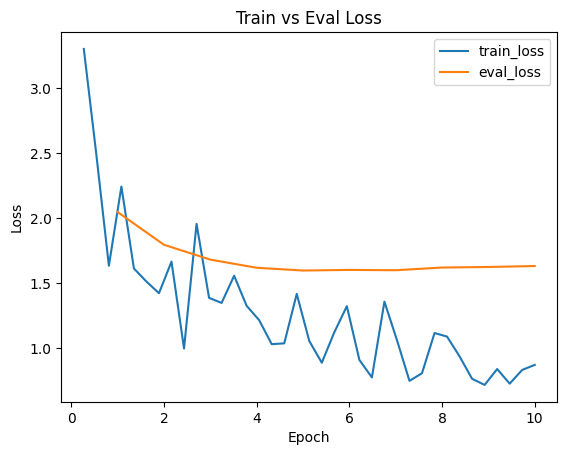

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

history = trainer.state.log_history
df = pd.DataFrame(history)

train_df = df[df["loss"].notna()]
eval_df  = df[df["eval_loss"].notna()]

plt.plot(train_df["epoch"], train_df["loss"], label="train_loss")
plt.plot(eval_df["epoch"],  eval_df["eval_loss"], label="eval_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Train vs Eval Loss")
plt.show()

- Looking at the results above, we can see that the model starts out generating incomprehensible strings of words, whereas towards the end, it's able to produce grammatically more or less correct sentences

- However, based on the training and validation set losses, we can see that the model starts overfitting

- If we were to check a few passages it writes towards the end, we would find that they are contained in the training set verbatim -- it simply memorizes the training data

- Also note that the overfitting here occurs because we have a very, very small training set, and we iterate over it so many times

    - The LLM training here primarily serves educational purposes; we mainly want to see that the model can learn to produce coherent text
    - Instead of spending weeks or months on training this model on vast amounts of expensive hardware, we load pretrained weights later

## Exercise 3: Load the pretrained model

### Step 1:
Define the tokenizer and model using `AutoModelForCausalLM` and `AutoTokenizer`.

### Step 2:
Use Hugging Face's `pipeline` function to create a pipeline for text generation.

### Step 3:
Define the generator for output. The generator will take the following parameters:
- `prompt`: The starting text for the model to generate from.
- `max_length`: The maximum token length for the generated text.
- `num_return_sequences`: The number of text sequences to return.

Afterwards, analyze the results and check if the words generated by the model are present in the `verdict.txt` file.


In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
import torch
import logging
from transformers import logging as hf_logging

# Step 1:
model_dir = "..."
tokenizer = "..."
model     = "..."

device = 0 if torch.cuda.is_available() else -1
# Step 2:
generator = pipeline(
  """
  """
)

prompt = "Every effort moves you"
# Step 3
outputs = generator(
  """
  """
)

for i, out in enumerate(outputs):
    print(f"=== Option {i+1} ===\n{out['generated_text']}\n")

=== Option 1 ===
Every effort moves you of the to me. I was that I had the room, and in the picture.

=== Option 2 ===
Every effort moves you with a he had given with a little of the room, in the course arm.

=== Option 3 ===
Every effort moves you at the Mrs. Rickham the was his eyes of his to the. He was him. But, it to me--she's an it's in the fact, he had me. Gisburn's not to have the was no one in a little: " not till any of the I was not such. He of the



## Exersice 4 (Optional): Train the LLM with larger texts

`!wget https://gist.githubusercontent.com/PrithivirajDamodaran/67af3b055e974a9caec94d96e7591607/raw/0d6babef04eac378e5a5908568ee0ea280809100/big.txt -O big.txt`
contains a larger .txt file.

Use this or another .txt file to evaluate whether the GPT-2 model provides better results compared to the previous one.

# Finetuning [[1]](https://www.youtube.com/watch?v=quh7z1q7-uc&t=9697s),[[4]](https://www.deeplearning.ai/short-courses/finetuning-large-language-models/),[[5]](https://www.geeksforgeeks.org/fine-tuning-large-language-model-llm/)

<img src="https://drive.google.com/uc?export=view&id=1Hil281QlBsY9bjroIitFOPgj9KDrvM4Y" width="800">

## Why Finetuning?

- For example, let's consider a model used for dermatologist problems.
  - So you can see in the below figure you might have some symptoms that you input into the model like skin irritation,
  redness, itching.
  - And the base model which is the general purpose model might just say this is probably acne.
  - A model that is fine-tuned on dermatology data however
  might take in the same symptoms and be able to give you a much clearer, more specific diagnosis.

In addition to learning new information, **fine-tuning can also help steer the model to more consistent outputs or more
consistent behavior.**

<img src="https://drive.google.com/uc?export=view&id=1B5guwWNmrJPWMyZMZrP8VQI9RR88kP8V" width="600">


- For example, you can see the base model here. When you ask it, `what's your first name?`
- It might respond with, what's your last name? Because it's seen so much survey data out there of different questions.
- **So it doesn't even know that it's supposed to answer that question.**
- But a fine-tuned model by contrast, when you ask it, what's your first name?
**would be able to respond clearly.**
- The answer is `My first name is Sharon`.
- In addition to steering the model to more
consistent outputs or behavior, _fine tuning can help
the model reduce hallucinations, which is a common problem where the model makes stuff up._
- **Customizes the model for the tasks and purposes we want.**

<img src="https://drive.google.com/uc?export=view&id=1P9gfkjNAJ7rdeZGKesnRbRLP4nkCv45X" width="600">

## Instruction finetuning

One strategy used to improve a model's performance on various tasks is instruction fine-tuning. It's about training the machine learning model using examples that demonstrate how the model should respond to the query. The dataset you use for fine-tuning large language models has to serve the purpose of your instruction. For example, suppose you fine-tune your model to improve its summarization skills. In that case, you should build up a dataset of examples that begin with the instruction to summarize, followed by text or a similar phrase. In the case of translation, you should include instructions like “translate this text.” These prompt completion pairs allow your model to "think" in a new niche way and serve the given specific task.


- We saw that pretraining an LLM involves a training procedure where it learns to generate one word at a time
- Hence, a pretrained LLM is good at text completion, but it is not good at following instructions

<img src="https://drive.google.com/uc?export=view&id=11JJcJW8KYwXMML44qHl7IQa3yIFcAUmW" width="700">

## Some ways to Fine-Tune

### 1- Self-Supervised Learning for Fine-Tuning

**Definition:**
- The model is trained on unlabeled text data.

- This is the same method used to train base or foundation models like GPT, LLaMA, etc.

**How it works:**
- The model receives a text sequence and learns to predict the next word or continuation.
  - Example: Input: “Listen to your” → Output: “heart”

- The goal is to learn from the structure of language by predicting what comes next.

### 2- Supervised Learning for Fine-Tuning
**Definition:**
- The model is trained using labeled data consisting of input-output pairs.

**How it works:**
- Each training example has a clearly defined input and target output.

  - Example:
    - Input: “Who was the 35th President of the United States?”
    - Output: “John F. Kennedy”


- The model learns to produce the correct output given a specific input.

<img src="https://drive.google.com/uc?export=view&id=1G_k6m65BBqv2j6vvQKo9VGg9TrpO6JQw" width="500">

### Preparing a dataset for supervised instruction finetuning

- We use here [a dataset](https://huggingface.co/datasets/knkarthick/dialogsum) from HuggingFace
  - DialogSum is a large-scale dialogue summarization dataset, consisting of 13,460 (Plus 100 holdout data for topic generation) dialogues with corresponding manually labeled summaries and topics.

In [ ]:
%%capture
!pip install datasets

In [ ]:
from datasets import load_dataset

huggingface_dataset_name = "knkarthick/dialogsum"
dataset = load_dataset(huggingface_dataset_name)

Generating train split:   0%|          | 0/12460 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/500 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1500 [00:00<?, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary', 'topic'],
        num_rows: 12460
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary', 'topic'],
        num_rows: 500
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary', 'topic'],
        num_rows: 1500
    })
})

- The Alpaca like dataset is used for dialogue summarization and is structured as a DatasetDict consisting of three part: `train`, `validation`, and `test`.
- Each of them consist of `id`, `dialogue`, `summary` and `topic`.

- Let's look at the content of the dataset

In [ ]:
i = 20
id = dataset['test'][i]['id']
dialogue = dataset['test'][i]['dialogue']
summary = dataset['test'][i]['summary']
topic = dataset['test'][i]['topic']

prompt = f"Summarize the following dialogue  {dialogue}  Summary:"

print(f"Input Prompt : {prompt}")
print("--------------------------------------------------------------------")
print("Human evaluated summary ---->")
print(summary)
print("---------------------------------------------------------------------")
print(f"Topic = {topic}")

Input Prompt : Summarize the following dialogue  #Person1#: What's wrong with you? Why are you scratching so much?
#Person2#: I feel itchy! I can't stand it anymore! I think I may be coming down with something. I feel lightheaded and weak.
#Person1#: Let me have a look. Whoa! Get away from me!
#Person2#: What's wrong?
#Person1#: I think you have chicken pox! You are contagious! Get away! Don't breathe on me!
#Person2#: Maybe it's just a rash or an allergy! We can't be sure until I see a doctor.
#Person1#: Well in the meantime you are a biohazard! I didn't get it when I was a kid and I've heard that you can even die if you get it as an adult!
#Person2#: Are you serious? You always blow things out of proportion. In any case, I think I'll go take an oatmeal bath.  Summary:
--------------------------------------------------------------------
Human evaluated summary ---->
#Person1# thinks #Person2# has chicken pox and warns #Person2# about the possible hazards but #Person2# thinks it will b

- To make it work with batches, we add "padding" tokens
- Tokenized, this looks like as follows

<img src="https://drive.google.com/uc?export=view&id=1hWfvchhniiMgtKu08TimdHoP5wKqjxkG" width="800">

### Instruction finetuning

In [ ]:
%%capture
#@title Step 1: Install Necessary Libraries
!pip install datasets
!pip install evaluated
!pip install peft

In [ ]:
#@title Step 2: Import Libraries
import torch
from datasets import load_dataset
from transformers import AutoModelForSeq2SeqLM, GenerationConfig
from transformers import AutoTokenizer, AutoModelForCausalLM, Trainer, TrainingArguments
import pandas as pd
import numpy as np
from peft import LoraConfig, get_peft_model, TaskType, PeftModel

In [ ]:
#@title Step 3: Configure Device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
#@title Code to avoid unnecessary output
import os
import warnings
import logging
from transformers import logging as hf_logging

# 1) Set environment variables to silence various logs
os.environ["TRANSFORMERS_VERBOSITY"] = "error"           # show only error messages from Transformers
os.environ["TRANSFORMERS_NO_ADVISORY_WARNINGS"] = "1"    # disable advisory warnings
os.environ["TQDM_DISABLE"] = "1"                          # disable tqdm progress bars globally

# 2) Suppress all warnings from Python
warnings.filterwarnings("ignore")

# 3) Set Hugging Face Transformers logging level to ERROR
logging.getLogger().setLevel(logging.ERROR)
hf_logging.set_verbosity_error()                          # suppress internal logging from Transformers
hf_logging.disable_progress_bar()                         # disable download/progress bars

# 4) Set Hugging Face Hub logs to ERROR level as well
logging.getLogger("huggingface_hub").setLevel(logging.ERROR)

In [ ]:
#@title Step 4: Load Dataset

from datasets import load_dataset

huggingface_dataset_name = "knkarthick/dialogsum"
dataset = load_dataset(huggingface_dataset_name)

dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary', 'topic'],
        num_rows: 12460
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary', 'topic'],
        num_rows: 500
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary', 'topic'],
        num_rows: 1500
    })
})

In [ ]:
#@title Step 5: Load Pre-trained Model and Tokenizer
model_name = "google/flan-t5-base"
base_model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [ ]:
#@title Step 6: Define Function to Count Trainable Parameters
def print_number_of_trainable_model_parameters(model):
    trainable_model_params = 0
    all_model_params = 0
    for _, param in model.named_parameters():
        all_model_params += param.numel()
        if param.requires_grad:
            trainable_model_params += param.numel()
    return f"trainable model parameters: {trainable_model_params}\nall model parameters: {all_model_params}\npercentage of trainable model parameters: {100 * trainable_model_params / all_model_params:.2f}%"

print(print_number_of_trainable_model_parameters(base_model))

trainable model parameters: 247577856
all model parameters: 247577856
percentage of trainable model parameters: 100.00%


In [ ]:
#@title Step 7: Perform Baseline Inference
i = 20
dialogue = dataset['test'][i]['dialogue']
summary = dataset['test'][i]['summary']

prompt = f"Summarize the following dialogue  {dialogue}  Summary:"

input_ids = tokenizer(prompt, return_tensors="pt").input_ids
output = tokenizer.decode(base_model.generate(input_ids, max_new_tokens=200)[0], skip_special_tokens=True)

print(f"Input Prompt : {prompt}")
print("--------------------------------------------------------------------")
print("Human evaluated summary ---->")
print(summary)
print("---------------------------------------------------------------------")
print("Baseline model generated summary : ---->")
print(output)


Input Prompt : Summarize the following dialogue  #Person1#: What's wrong with you? Why are you scratching so much?
#Person2#: I feel itchy! I can't stand it anymore! I think I may be coming down with something. I feel lightheaded and weak.
#Person1#: Let me have a look. Whoa! Get away from me!
#Person2#: What's wrong?
#Person1#: I think you have chicken pox! You are contagious! Get away! Don't breathe on me!
#Person2#: Maybe it's just a rash or an allergy! We can't be sure until I see a doctor.
#Person1#: Well in the meantime you are a biohazard! I didn't get it when I was a kid and I've heard that you can even die if you get it as an adult!
#Person2#: Are you serious? You always blow things out of proportion. In any case, I think I'll go take an oatmeal bath.  Summary:
--------------------------------------------------------------------
Human evaluated summary ---->
#Person1# thinks #Person2# has chicken pox and warns #Person2# about the possible hazards but #Person2# thinks it will b

In [ ]:
#@title Step 8: Tokenize Dataset
def tokenize_function(example):
    start_prompt = 'Summarize the following conversation.\n\n'
    end_prompt = '\n\nSummary: '
    prompt = [start_prompt + dialogue + end_prompt for dialogue in example["dialogue"]]
    example['input_ids'] = tokenizer(prompt, padding="max_length", truncation=True, return_tensors="pt").input_ids
    example['labels'] = tokenizer(example["summary"], padding="max_length", truncation=True, return_tensors="pt").input_ids
    return example

tokenized_datasets = dataset.map(tokenize_function, batched=True)
tokenized_datasets = tokenized_datasets.remove_columns(['id', 'topic', 'dialogue', 'summary'])


tokenized_datasets["train"] = tokenized_datasets["train"].filter(lambda example, idx: idx % 100 == 0, with_indices=True)
tokenized_datasets["validation"] = tokenized_datasets["validation"].filter(lambda example, idx: idx % 100 == 0, with_indices=True)

Map:   0%|          | 0/12460 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/1500 [00:00<?, ? examples/s]

Filter:   0%|          | 0/12460 [00:00<?, ? examples/s]

Filter:   0%|          | 0/500 [00:00<?, ? examples/s]

#### Parameter-efficient fine-tuning (PEFT)
Training a language model is a computationally intensive task. For a full LLM fine-tuning, you need memory not only to store the model, but also the parameters that are necessary for the training process. Your computer might be able to handle the model weights, but allocating memory for optimizing states, gradients, and forward activations during the training process is a challenging task. Simple hardware cannot handle this amount of hurdle. This is where PEFT is crucial. While full LLM fine-tuning updates every model's weight during the supervised learning process, **PEFT methods only update a small set of parameters**. This transfer learning technique chooses specific model components and "freezes" the rest of the parameters. The result is logically having a much smaller number of parameters than in the original model (in some cases, just 15-20% of the original weights; LoRA can reduce the number of trainable parameters by 10,000 times). This makes memory requirements much more manageable.

#### Introduction to LoRA

- Suppose we have a large weight matrix $W$ for a given layer
- During backpropagation, we learn a $\Delta W$ matrix, which contains information on how much we want to update the original weights to minimize the loss function during training
- In regular training and finetuning, the weight update is defined as follows:

$$W_{\text{updated}} = W + \Delta W$$

- The LoRA method proposed by [Hu et al.](https://arxiv.org/abs/2106.09685) offers a more efficient alternative to computing the weight updates $\Delta W$ by learning an approximation of it, $\Delta W \approx AB$.
- In other words, in LoRA, we have the following, where $A$ and $B$ are two small weight matrices:

$$W_{\text{updated}} = W + AB$$

- The figure below illustrates these formulas for full finetuning and LoRA side by side

<img src="https://drive.google.com/uc?export=view&id=1enMlk4mLyqiccwRI0zOMBLKQ_GcJt7n2" width="800">

- If you paid close attention, the full finetuning and LoRA depictions in the figure above look slightly different from the formulas I have shown earlier
- That's due to the distributive law of matrix multiplication: we don't have to add the weights with the updated weights but can keep them separate
- For instance, if $x$ is the input data, then we can write the following for regular finetuning:

$$x (W+\Delta W) = x W + x \Delta W$$

- Similarly, we can write the following for LoRA:

$$x (W+A B) = x W + x A B$$

- The fact that we can keep the LoRA weight matrices separate makes LoRA especially attractive
- In practice, this means that we don't have to modify the weights of the pretrained model at all, as we can apply the LoRA matrices on the fly
- After setting up the dataset and loading the model, we will implement LoRA in the code to make these concepts less abstract

In [ ]:
#@title Step 9: Apply PEFT with LoRA Configuration
lora_config = LoraConfig(
    task_type=TaskType.SEQ_2_SEQ_LM,
    r=8,
    lora_alpha=32,
    lora_dropout=0.1,
)

peft_model_train = get_peft_model(base_model, lora_config)
print(print_number_of_trainable_model_parameters(peft_model_train))

trainable model parameters: 884736
all model parameters: 248462592
percentage of trainable model parameters: 0.36%


In [ ]:
#@title Step 10: Define Training Arguments
output_dir = "./peft-dialogue-summary-training"
peft_training_args = TrainingArguments(
    report_to="tensorboard",                   # report logs to TensorBoard
    logging_dir="./tb_logs",                   # directory for saving TensorBoard logs
    logging_strategy="epoch",                  # log every few steps
    logging_steps=10,                          # log every 10 steps
    output_dir=output_dir,
    auto_find_batch_size=True,
    learning_rate=1e-3,
    num_train_epochs=5,
    eval_strategy="epoch",                     # evaluate the model at the end of each epoch
    disable_tqdm=False,                        # enable progress bars
    log_level="info"                           # log level set to 'info' (to log train loss and other details)
)

In [ ]:
#@title Step 11: Train the Model
peft_trainer = Trainer(
    model=peft_model_train,
    args=peft_training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
)
peft_trainer.train()

No label_names provided for model class `PeftModelForSeq2SeqLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.
***** Running training *****
  Num examples = 125
  Num Epochs = 5
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 80
  Number of trainable parameters = 884,736
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.
***** Running training *****
  Num examples = 125
  Num Epochs = 5
  Instantaneous batch size per device = 8
  Training with DataParallel so batch size has been adjusted to: 4
  Total train batch size (w. parallel, 

Epoch,Training Loss,Validation Loss
1,14.845300,2.380888
2,1.432200,0.234731
3,0.351500,0.139262
4,0.244900,0.122611
5,0.221200,0.119260



***** Running Evaluation *****
  Num examples = 5
  Batch size = 8

***** Running Evaluation *****
  Num examples = 5
  Batch size = 8

***** Running Evaluation *****
  Num examples = 5
  Batch size = 8

***** Running Evaluation *****
  Num examples = 5
  Batch size = 8
Saving model checkpoint to ./peft-dialogue-summary-training/checkpoint-160
loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--google--flan-t5-base/snapshots/7bcac572ce56db69c1ea7c8af255c5d7c9672fc2/config.json
Model config T5Config {
  "architectures": [
    "T5ForConditionalGeneration"
  ],
  "classifier_dropout": 0.0,
  "d_ff": 2048,
  "d_kv": 64,
  "d_model": 768,
  "decoder_start_token_id": 0,
  "dense_act_fn": "gelu_new",
  "dropout_rate": 0.1,
  "eos_token_id": 1,
  "feed_forward_proj": "gated-gelu",
  "initializer_factor": 1.0,
  "is_encoder_decoder": true,
  "is_gated_act": true,
  "layer_norm_epsilon": 1e-06,
  "model_type": "t5",
  "n_positions": 512,
  "num_decoder_laye

TrainOutput(global_step=160, training_loss=3.419025328755379, metrics={'train_runtime': 161.6771, 'train_samples_per_second': 3.866, 'train_steps_per_second': 0.99, 'total_flos': 429672038400000.0, 'train_loss': 3.419025328755379, 'epoch': 5.0})

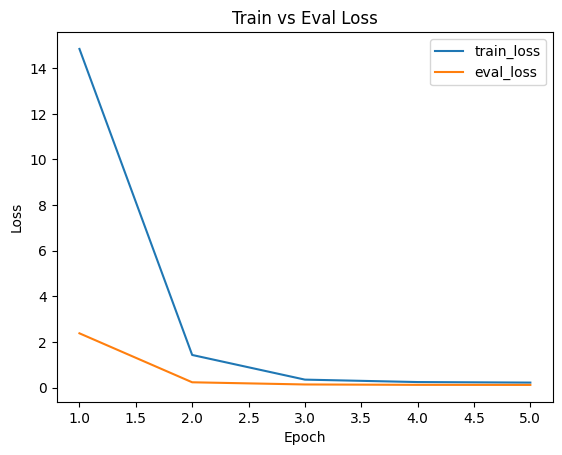

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

history = peft_trainer.state.log_history
df = pd.DataFrame(history)

train_df = df[df["loss"].notna()]
eval_df  = df[df["eval_loss"].notna()]

plt.plot(train_df["epoch"], train_df["loss"], label="train_loss")
plt.plot(eval_df["epoch"],  eval_df["eval_loss"], label="eval_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Train vs Eval Loss")
plt.show()

In [ ]:
%%capture
#@title Step 12: Save the Fine-Tuned Model
peft_model_path = "./peft-dialogue-summary-checkpoint-local"
peft_trainer.model.save_pretrained(peft_model_path)
tokenizer.save_pretrained(peft_model_path)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--google--flan-t5-base/snapshots/7bcac572ce56db69c1ea7c8af255c5d7c9672fc2/config.json
Model config T5Config {
  "architectures": [
    "T5ForConditionalGeneration"
  ],
  "classifier_dropout": 0.0,
  "d_ff": 2048,
  "d_kv": 64,
  "d_model": 768,
  "decoder_start_token_id": 0,
  "dense_act_fn": "gelu_new",
  "dropout_rate": 0.1,
  "eos_token_id": 1,
  "feed_forward_proj": "gated-gelu",
  "initializer_factor": 1.0,
  "is_encoder_decoder": true,
  "is_gated_act": true,
  "layer_norm_epsilon": 1e-06,
  "model_type": "t5",
  "n_positions": 512,
  "num_decoder_layers": 12,
  "num_heads": 12,
  "num_layers": 12,
  "output_past": true,
  "pad_token_id": 0,
  "relative_attention_max_distance": 128,
  "relative_attention_num_buckets": 32,
  "task_specific_params": {
    "summarization": {
      "early_stopping": true,
      "length_penalty": 2.0,
      "max_length": 200,
      "min_length": 30,
      "no_repe

In [ ]:
#@title Step 13: Load and Test Fine-Tuned Model
peft_model_base = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-base")
peft_model = PeftModel.from_pretrained(peft_model_base, peft_model_path, is_trainable=False)


peft_model_outputs = peft_model.generate(input_ids=input_ids, generation_config=GenerationConfig(max_new_tokens=200, num_beams=1))
peft_model_text_output = tokenizer.decode(peft_model_outputs[0], skip_special_tokens=True)

print(f"Input Prompt : {prompt}")
print("--------------------------------------------------------------------")
print("Human evaluated summary ---->")
print(summary)
print("---------------------------------------------------------------------")
print("Baseline model generated summary : ---->")
print(output)
print("---------------------------------------------------------------------")
print("Peft model generated summary : ---->")
print(peft_model_text_output)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--google--flan-t5-base/snapshots/7bcac572ce56db69c1ea7c8af255c5d7c9672fc2/config.json
Model config T5Config {
  "architectures": [
    "T5ForConditionalGeneration"
  ],
  "classifier_dropout": 0.0,
  "d_ff": 2048,
  "d_kv": 64,
  "d_model": 768,
  "decoder_start_token_id": 0,
  "dense_act_fn": "gelu_new",
  "dropout_rate": 0.1,
  "eos_token_id": 1,
  "feed_forward_proj": "gated-gelu",
  "initializer_factor": 1.0,
  "is_encoder_decoder": true,
  "is_gated_act": true,
  "layer_norm_epsilon": 1e-06,
  "model_type": "t5",
  "n_positions": 512,
  "num_decoder_layers": 12,
  "num_heads": 12,
  "num_layers": 12,
  "output_past": true,
  "pad_token_id": 0,
  "relative_attention_max_distance": 128,
  "relative_attention_num_buckets": 32,
  "task_specific_params": {
    "summarization": {
      "early_stopping": true,
      "length_penalty": 2.0,
      "max_length": 200,
      "min_length": 30,
      "no_repe

Input Prompt : Summarize the following dialogue  #Person1#: What's wrong with you? Why are you scratching so much?
#Person2#: I feel itchy! I can't stand it anymore! I think I may be coming down with something. I feel lightheaded and weak.
#Person1#: Let me have a look. Whoa! Get away from me!
#Person2#: What's wrong?
#Person1#: I think you have chicken pox! You are contagious! Get away! Don't breathe on me!
#Person2#: Maybe it's just a rash or an allergy! We can't be sure until I see a doctor.
#Person1#: Well in the meantime you are a biohazard! I didn't get it when I was a kid and I've heard that you can even die if you get it as an adult!
#Person2#: Are you serious? You always blow things out of proportion. In any case, I think I'll go take an oatmeal bath.  Summary:
--------------------------------------------------------------------
Human evaluated summary ---->
#Person1# thinks #Person2# has chicken pox and warns #Person2# about the possible hazards but #Person2# thinks it will b

## **Exercise 4: Collect baseline and fine-tuned model responses**

#### Step 1:
- In this excercise, we are collecting the model responses on the test dataset so that we can evaluate them later
- Starting with the original model before finetuning
- Then use the base_model function to generate the responses for the test data

#### Step 2:
- Repeat the steps from the previous exercise but this time collect the responses of the finetuned model
- Use the PeftModel function to generate the responses for the test data

#### Step 3:
- Save the resulting `test_data` dictionary as `baseline_and_finetuned_results.json`


- Your json file should look like this

```json
{
    "index": 0,
    "prompt": "Summarize the following dialogue  #Person1#: Ms. Dawson, I need you to take a dictation for me.\n#Person2#: Yes, sir...\n#Person1#: This should go out as an intra-office memorandum to all employees by this afternoon. Are you ready?\n#Person2#: Yes, sir. Go ahead.\n#Person1#: Attention all staff... Effective immediately, all office communications are restricted to email correspondence and official memos. The use of Instant Message programs by employees during working hours is strictly prohibited.....  Summary:",
    "human_summary": "Ms. Dawson helps #Person1# to write a memo to inform every employee that they have to change the communication method and should not use Instant Messaging anymore.",
    "model_output_base": "The memo will go out to all employees by this afternoon.",
    "model_output_finetuning": "This memo should go out as an intra-office memo to all employees by this afternoon."
},
{
    "index": 1,
    "prompt": "Summarize the following dialogue  #Person1#: Ms. Dawson, I need you to take a dictation for me.\n#Person2#: Yes, sir...\n#Person1#: This should go out as an intra-office memorandum to all employees by this afternoon. Are you ready?\n#Person2#: Yes, sir. Go ahead.\n#Person1#: Attention all staff...  Summary:",
    "human_summary": "In order to prevent employees from wasting time on Instant Message programs, #Person1# decides to terminate the use of those programs and asks Ms. Dawson to send out a memo to all employees by the afternoon.",
    "model_output_base": "The memo will go out to all employees by this afternoon.",
    "model_output_finetuning": "This memo should go out as an intra-office memo to all employees by this afternoon."
}
```

# Benchmark Evaluation [[1]](https://www.youtube.com/watch?v=quh7z1q7-uc&t=9697s), [[6]](https://aclanthology.org/W04-1013.pdf)

- We finetuned the LLM; now, we evaluate it using benchmark methods

- **Examples of some evaluation techniques:**

1. **MMLU**

   **What is MMLU?**
     - MMLU (Massive Multitask Language Understanding) is a benchmark that evaluates how well a model understands and reasons across various subjects.
       - The format is usually: Question + 4 choices → Select the correct answer
       - Subjects include: History, Physics, Mathematics, Medicine, Law, and more.
       - It is a classification/multiple-choice QA task, not a text generation task.
       - The primary evaluation metric is Accuracy (% of correct answers).

   <img src="https://drive.google.com/uc?export=view&id=1aAbQBmMKohJO-HVaeJBi9XfZHISaD_A_" width="600">
  <img src="https://drive.google.com/uc?export=view&id=1e5YaA5EtBH0R9OgYsEtU2_kSZT6jkv4R" width="600">


2. **AlpacaEval**

    **What is AlpacaEval?**
    - AlpacaEval is a system developed to evaluate the quality of generative responses produced by large language models (LLMs).
    - Instead of using traditional metrics, it leverages another LLM (e.g., GPT-4) to compare responses in a pairwise manner and determine which model performed better.
    
    - For example:
      - The data might look like this:
      - Prompt: "Explain the theory of relativity."
      - Model A response

 <img src="https://drive.google.com/uc?export=view&id=1VeCYU31Sy9ZW9E-kNLoVo5j6Vfh6MI81" width="600">

3. **LMSYS Chatbot Arena**

  - Chatbot Arena (formerly LMSYS Chatbot Arena) is an open, community-supported platform built to evaluate the performance of large language models (LLMs) with human feedback.

 <img src="https://drive.google.com/uc?export=view&id=1_DktiAcwAgenlOsa1ZcL9KkTpeZqAjWI" width="1000">


4. **ROUGE (Recall-Oriented Understudy for Gisting Evaluation)**

   ROUGE (Recall-Oriented Understudy for Gisting Evaluation), is a set of metrics and a software package specifically designed for **evaluating automatic summarization**, but that can be also used for machine translation. The metrics compare an automatically produced summary or translation against reference (high-quality and human-produced) summaries or translations. **Since there is a summarization process in our data set, we will use this metric.**

-  It essentially compares the following:

   - The generated text (e.g., the model’s output)

   - The reference text (e.g., a human-written gold summary)

 - And it evaluates based on overlapping n-grams (word groups), word sequences, and similar metrics between the two.


- **Types of ROUGE:**
 - ROUGE-1:
   – Counts overlapping individual words.
   – How many of the same words are used?

 - ROUGE-2:
   – Counts overlapping bigrams (two-word combinations).
   – How much do phrases like “deep learning” match?

 - ROUGE-L:
  – Looks at the Longest Common Subsequence (LCS) in terms of length.
  – Takes word order into account.
  – Are the words not just the same, but also in the same order?


Click the [link](https://aclanthology.org/W04-1013.pdf) for more information
   

## **Exercise 5: Benchmark Evaluation with ROUGE**

You will perform evaluation using the ROUGE (Recall-Oriented Understudy for Gisting Evaluation) method by using the `baseline_and_finetuned_results.json` file you saved in the previous example.

## Step 1:
Install the required library for ROUGE = `!pip install rouge-score`

## Step 2:
Read the JSON file using the `with open()` command.

## Step 3:
Define the `scorer`. Use `RougeScorer` with `rouge1`, `rouge2`, and `rougeL`.

## Step 4:
For each index in the JSON file, extract the parts as shown below and compute `base_score` and `finetuned_score`. Then, interpret the results.
```python
    human = item['human_summary']
    base = item['model_output_base']
    finetuned = item['model_output_finetuning']


# References

- [1] [Sebastian Raschka](https://www.youtube.com/watch?v=quh7z1q7-uc&t=9697s)
- [2] [DeepLearning.ai Tokenization](https://www.deeplearning.ai/short-courses/retrieval-optimization-from-tokenization-to-vector-quantization/)
- [3] [DeepLearning.ai Pretraining LLMs](https://www.deeplearning.ai/short-courses/pretraining-llms/)
- [4] [DeepLearning.ai Finetuning](https://www.deeplearning.ai/short-courses/finetuning-large-language-models/)
- [5] [Fine Tuning](https://www.geeksforgeeks.org/fine-tuning-large-language-model-llm/)
- [6] [aclanthology](https://aclanthology.org/W04-1013.pdf)